In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import StandardScaler
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)
import warnings
warnings.filterwarnings('ignore')

In [10]:
data_telecom=pd.read_csv(r'train_PDjVQMB.csv')
data_telecom.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


In [655]:
data_telecom.shape

(6650, 12)

In [656]:
data_telecom['Is_Churn'].value_counts(normalize=True)

0    0.768872
1    0.231128
Name: Is_Churn, dtype: float64

In [6]:
100*data_telecom.isnull().sum()/len(data_telecom.index)

ID                    0.0
Age                   0.0
Gender                0.0
Income                0.0
Balance               0.0
Vintage               0.0
Transaction_Status    0.0
Product_Holdings      0.0
Credit_Card           0.0
Credit_Category       0.0
Is_Churn              0.0
dtype: float64

In [7]:
print(data_telecom['Vintage'].unique())
print(data_telecom['Transaction_Status'].unique())
print(data_telecom['Product_Holdings'].unique())
print(data_telecom['Credit_Card'].unique())
print(data_telecom['Gender'].unique())
print(data_telecom['Income'].unique())
print(data_telecom['Credit_Category'].unique())
print(data_telecom['Is_Churn'].unique())

[4 2 0 1 3 5]
[0 1]
['1' '2' '3+']
[0 1]
['Female' 'Male']
['5L - 10L' 'Less than 5L' 'More than 15L' '10L - 15L']
['Average' 'Poor' 'Good']
[1 0]


In [8]:
data_telecom.dtypes

ID                     object
Age                     int64
Gender                 object
Income                 object
Balance               float64
Vintage                 int64
Transaction_Status      int64
Product_Holdings       object
Credit_Card             int64
Credit_Category        object
Is_Churn                int64
dtype: object

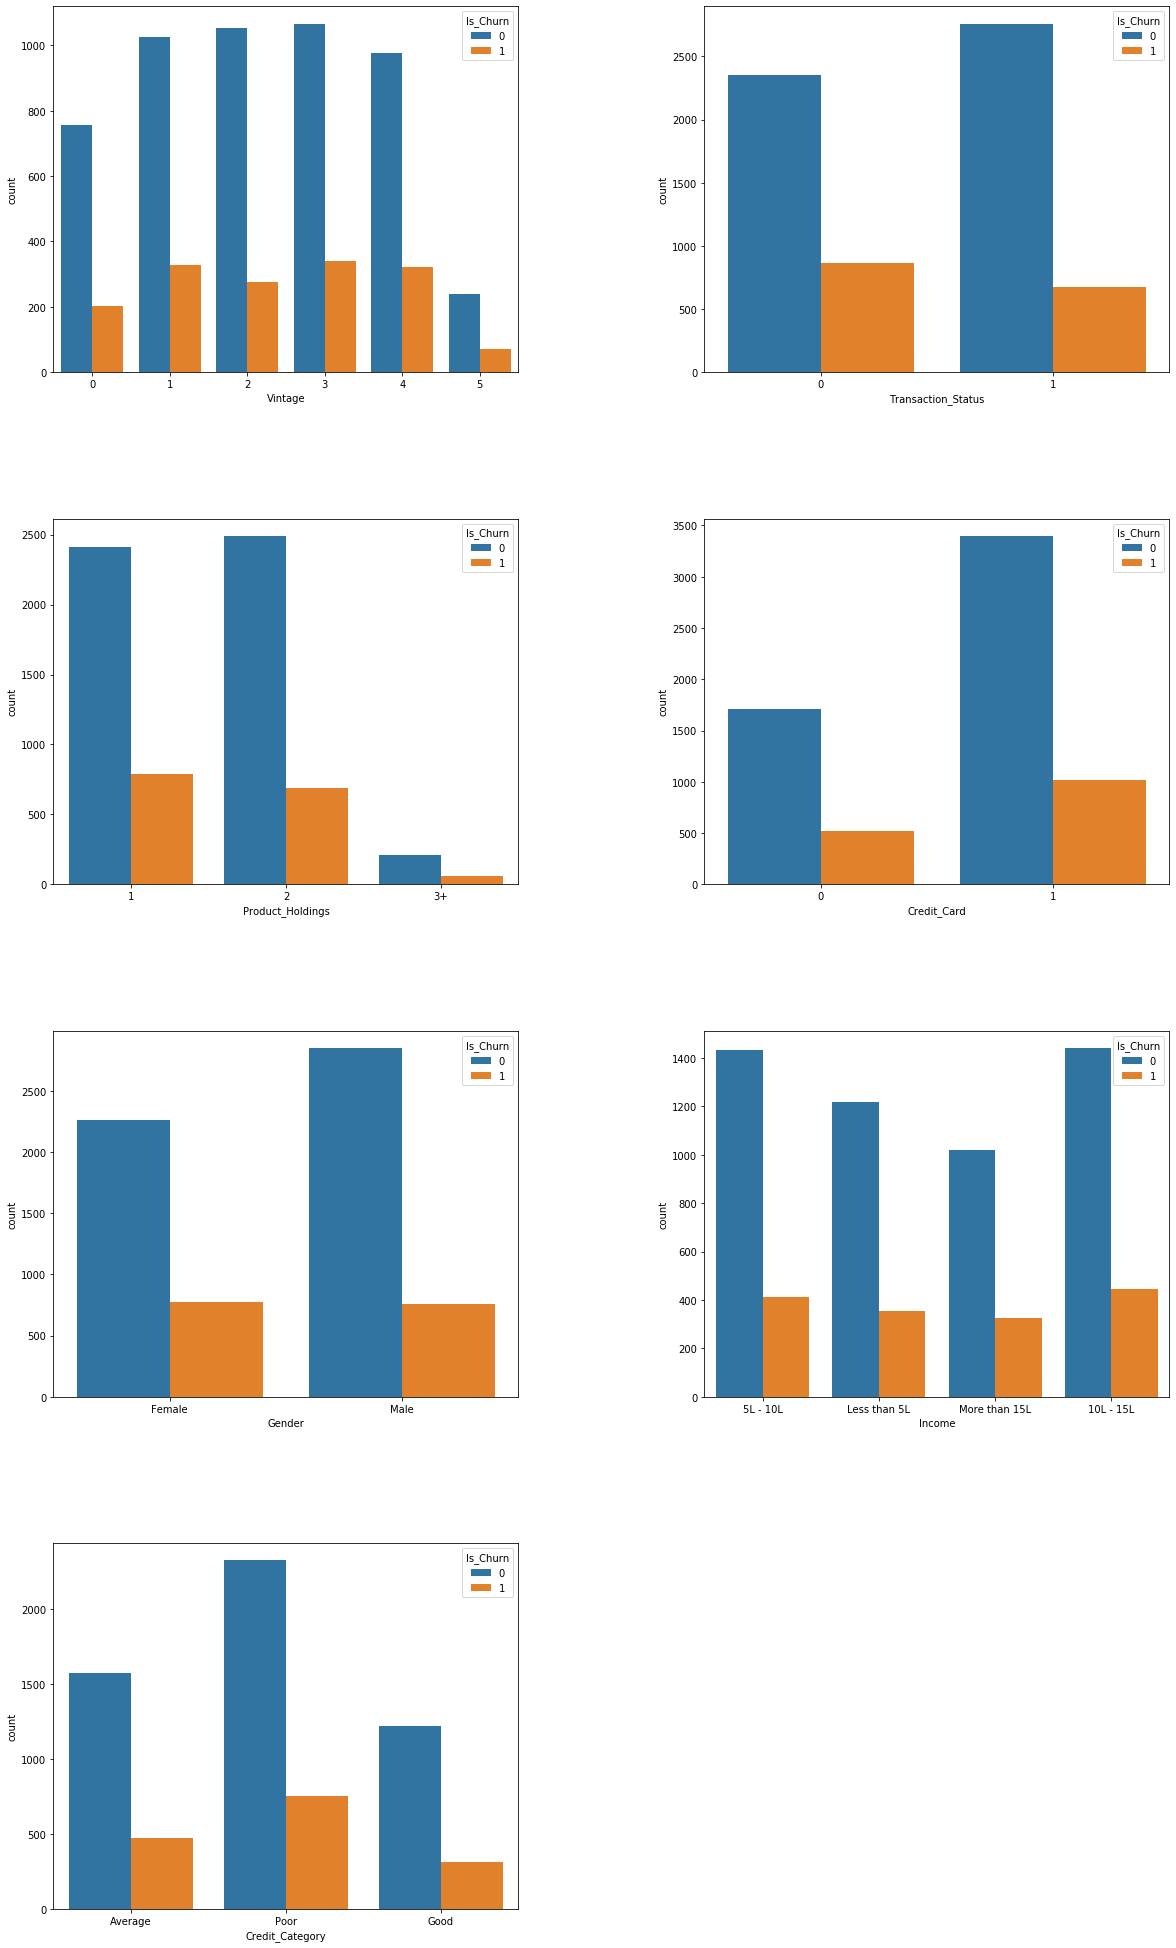

In [14]:
plt.figure(figsize = (20,35))
cat_var=['Vintage','Transaction_Status','Product_Holdings','Credit_Card','Gender','Income','Credit_Category']
j=1
plt.subplots_adjust(hspace=0.4, wspace=0.4)
for i in cat_var:
    plt.subplot(4,2,j)
    sns.countplot(x=i, hue='Is_Churn',data= data_telecom)
    j=j+1

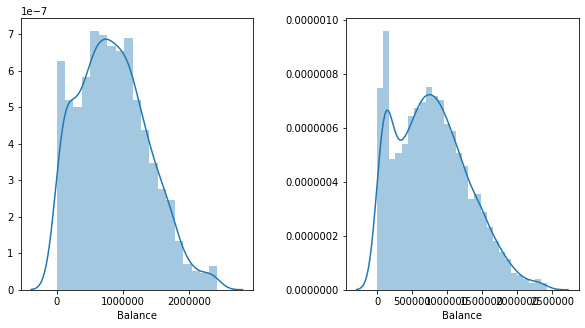

In [11]:
#We can see in below plot that there is sudden drop in incoming and outgoing in 8th month data
plt.figure(figsize = (10,5))
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.subplot(1,2,1)
sns.distplot(data_telecom.loc[data_telecom['Is_Churn']==1,'Balance'])
plt.subplot(1,2,2)
sns.distplot(data_telecom.loc[data_telecom['Is_Churn']==0,'Balance'])

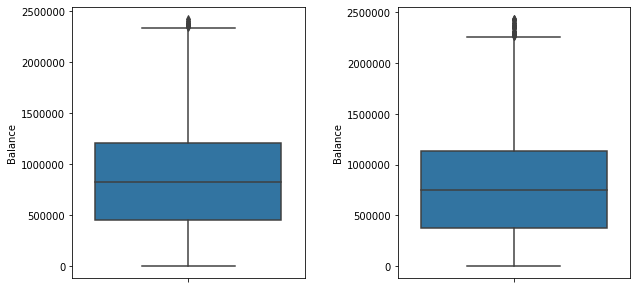

In [12]:
plt.figure(figsize = (10,5))
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.subplot(1,2,1)
sns.boxplot(y=data_telecom.loc[data_telecom['Is_Churn']==1,'Balance'])
plt.subplot(1,2,2)
sns.boxplot(y=data_telecom.loc[data_telecom['Is_Churn']==0,'Balance'])

In [13]:
data_telecom.loc[data_telecom['Balance']>data_telecom['Balance'].quantile(0.75)+1.5*(data_telecom['Balance'].quantile(0.75)-data_telecom['Balance'].quantile(0.25)),'Is_Churn'].value_counts()

0    24
1    14
Name: Is_Churn, dtype: int64

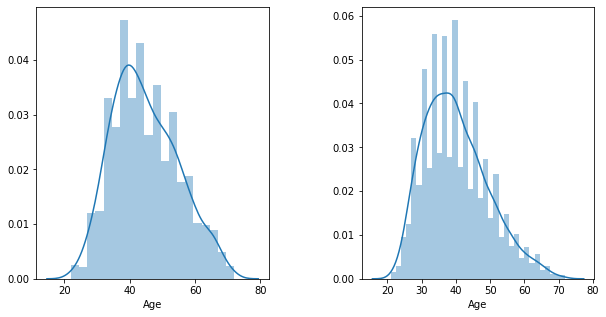

In [14]:
#We can see in below plot that there is sudden drop in incoming and outgoing in 8th month data
plt.figure(figsize = (10,5))
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.subplot(1,2,1)
sns.distplot(data_telecom.loc[data_telecom['Is_Churn']==1,'Age'])
plt.subplot(1,2,2)
sns.distplot(data_telecom.loc[data_telecom['Is_Churn']==0,'Age'])

In [11]:
bins=[20,30,40,50,60,70,np.inf]
data_telecom['Age_Bin']=pd.cut(data_telecom['Age'],bins=bins,labels=[0,1,2,3,4,5])

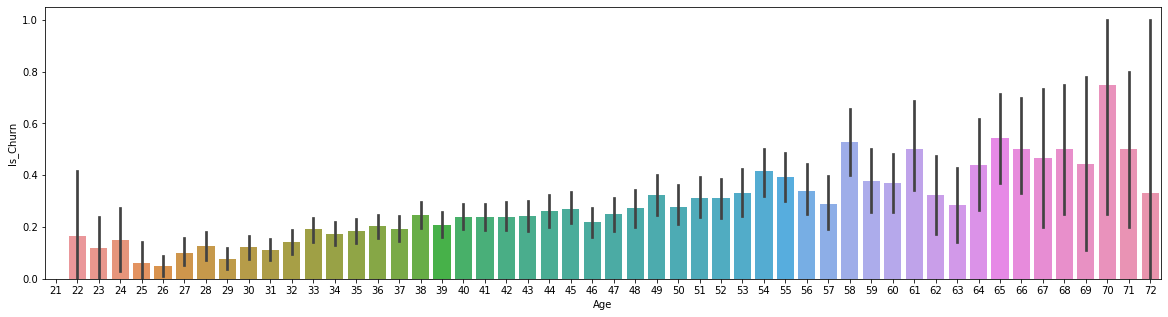

In [286]:
plt.figure(figsize = (20,5))
sns.barplot(data_telecom['Age'],data_telecom['Is_Churn'])

In [16]:
data_telecom.head(29)

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn,Age_Bin
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0,3
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0,1
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1,2
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1,1
5,e7a8332a,31,Female,Less than 5L,111026.79,4,1,1,0,Good,0,1
6,f2de1836,56,Male,Less than 5L,1072102.23,2,1,2,1,Average,0,3
7,f422388a,41,Female,10L - 15L,1587489.75,4,0,1,1,Poor,1,2
8,773aa149,60,Female,10L - 15L,1465812.54,0,0,1,1,Poor,1,3
9,443be80f,32,Female,5L - 10L,770796.81,3,0,1,1,Poor,0,1


In [12]:
data_telecom_final=data_telecom.drop(['ID','Age'],axis=1)

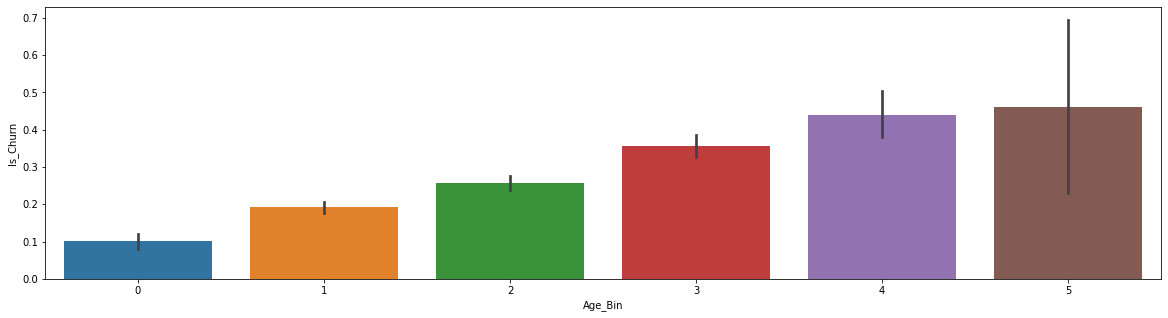

In [480]:
plt.figure(figsize = (20,5))
sns.barplot(data_telecom_final['Age_Bin'],data_telecom_final['Is_Churn'])

In [18]:
data_telecom_final.dtypes

Gender                  object
Income                  object
Balance                float64
Vintage                  int64
Transaction_Status       int64
Product_Holdings        object
Credit_Card              int64
Credit_Category         object
Is_Churn                 int64
Age_Bin               category
dtype: object

In [19]:
for i in cat_var:
    data_telecom_final[i]=data_telecom_final[i].astype('category')

In [20]:
data_telecom_final.dtypes

Gender                category
Income                category
Balance                float64
Vintage               category
Transaction_Status    category
Product_Holdings      category
Credit_Card           category
Credit_Category       category
Is_Churn                 int64
Age_Bin               category
dtype: object

In [21]:
data_telecom_final.head()

,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn,Age_Bin
0,Female,5L - 10L,563266.44,4,0,1,0,Average,1,1
1,Female,Less than 5L,875572.11,2,1,1,1,Poor,0,3
2,Female,More than 15L,701607.06,2,1,2,0,Poor,0,1
3,Female,More than 15L,1393922.16,0,1,2,1,Poor,1,2
4,Female,More than 15L,893146.23,1,1,1,1,Good,1,1


In [15]:
data_telecom_lg=data_telecom_final.copy()
for i in cat_var:
    dummies=pd.get_dummies(data_telecom_final[i],prefix=i,drop_first=True)
    data_telecom_lg=pd.concat([data_telecom_lg,dummies],axis=1)
    
data_telecom_lg=data_telecom_lg.drop(cat_var,axis=1)
data_telecom_lg.head()

,Balance,Is_Churn,Age_Bin,Vintage_1,Vintage_2,Vintage_3,Vintage_4,Vintage_5,Transaction_Status_1,Product_Holdings_2,Product_Holdings_3+,Credit_Card_1,Gender_Male,Income_5L - 10L,Income_Less than 5L,Income_More than 15L,Credit_Category_Good,Credit_Category_Poor
0,563266.44,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,875572.11,0,3,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1
2,701607.06,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1
3,1393922.16,1,2,0,0,0,0,0,1,1,0,1,0,0,0,1,0,1
4,893146.23,1,1,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0


In [16]:
from sklearn.model_selection import train_test_split
X=data_telecom_lg.drop('Is_Churn',axis=1)
y=data_telecom_lg['Is_Churn']
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [17]:
print(y_test.value_counts())
print(y_train.value_counts())

0    1540
1     455
Name: Is_Churn, dtype: int64
0    3573
1    1082
Name: Is_Churn, dtype: int64


In [433]:
X_train=data_telecom_lg.drop('Is_Churn',axis=1)
y_train=data_telecom_lg['Is_Churn']

In [153]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train[['Balance']]=scaler.fit_transform(X_train[['Balance']])
#X_test[['Balance']]=scaler.transform(X_test[['Balance']])

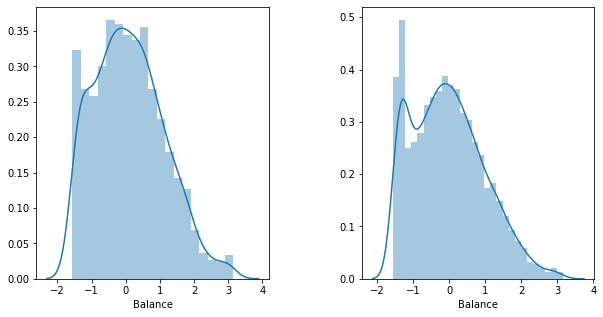

In [244]:
#We can see in below plot that there is sudden drop in incoming and outgoing in 8th month data
plt.figure(figsize = (10,5))
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.subplot(1,2,1)
sns.distplot(X_train.loc[data_telecom['Is_Churn']==1,'Balance'])
plt.subplot(1,2,2)
sns.distplot(X_train.loc[data_telecom['Is_Churn']==0,'Balance'])

In [434]:
X_train.head()

,Balance,Age_Bin,Vintage_1,Vintage_2,Vintage_3,Vintage_4,Vintage_5,Transaction_Status_1,Product_Holdings_2,Product_Holdings_3+,Credit_Card_1,Gender_Male,Income_5L - 10L,Income_Less than 5L,Income_More than 15L,Credit_Category_Good,Credit_Category_Poor
0,563266.44,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,875572.11,3,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1
2,701607.06,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1
3,1393922.16,2,0,0,0,0,0,1,1,0,1,0,0,0,1,0,1
4,893146.23,1,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0


In [500]:
X_train.shape

(6650, 17)

In [20]:
X_train['Age_Bin']=X_train['Age_Bin'].astype('int')
X_test['Age_Bin']=X_test['Age_Bin'].astype('int')

In [ ]:
folds = 5
skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=100)

In [21]:
from xgboost import XGBClassifier
cv_params = {'max_depth': [1,2,3,4,5,6,7,8], 'min_child_weight': [1,2,3,4]}    # parameters to be tries in the grid search
fix_params = {'learning_rate': 0.2, 'n_estimators': 100, 'objective': 'binary:logistic'}   #other parameters, fixed for the moment 
csv = GridSearchCV(XGBClassifier(**fix_params), cv_params, scoring = 'f1_macro', cv = skf)

In [22]:
csv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.2, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=Non

In [23]:
csv.best_params_

{'max_depth': 8, 'min_child_weight': 1}

In [24]:
cv_params = {'subsample': [0.7,0.8,0.9], 'max_delta_step': [0,1,2,4]}
fix_params = {'learning_rate': 0.2, 'n_estimators': 100, 'objective': 'binary:logistic', 'max_depth': 8, 'min_child_weight':1}

In [25]:
csv = GridSearchCV(XGBClassifier(**fix_params), cv_params, scoring = 'f1_macro', cv = skf) 
csv.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.2, max_delta_step=None,
                                     max_depth=8, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
   

In [26]:
csv.best_params_

{'max_delta_step': 1, 'subsample': 0.8}

In [27]:
cv_params = {'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]}
fix_params = {'max_delta_step': 1,'subsample':0.9, 'n_estimators': 100, 'objective': 'binary:logistic', 'max_depth': 8, 'min_child_weight':1}

In [28]:
csv = GridSearchCV(XGBClassifier(**fix_params), cv_params, scoring = 'f1_macro', cv = skf) 
csv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=1,
                                     max_depth=8, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=0.9,
      

In [29]:
csv.best_params_

{'learning_rate': 0.2}

In [30]:
cv_params = {'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]}
fix_params = {'max_delta_step': 1,'subsample':0.9, 'learning_rate': 0.2, 'objective': 'binary:logistic', 'max_depth': 8, 'min_child_weight':1}

In [31]:
csv = GridSearchCV(XGBClassifier(**fix_params), cv_params, scoring = 'f1_macro', cv = skf) 
csv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.2, max_delta_step=1,
                                     max_depth=8, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=0.9,
       

In [32]:
csv.best_params_

{'reg_alpha': 1e-05}

In [33]:
cv=pd.DataFrame(csv.cv_results_)
cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_reg_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.257298,0.032764,0.005828,0.000287,1e-05,{'reg_alpha': 1e-05},0.539288,0.517134,0.541701,0.538822,0.517966,0.530982,0.011014,1
1,0.249605,0.003661,0.005857,0.000167,0.01,{'reg_alpha': 0.01},0.519202,0.522901,0.515080,0.517609,0.517821,0.518523,0.002562,4
2,0.257545,0.004448,0.006386,0.000536,0.1,{'reg_alpha': 0.1},0.510585,0.534362,0.540565,0.510790,0.510599,0.521380,0.013278,3
3,0.270485,0.014372,0.006249,0.000528,1,{'reg_alpha': 1},0.529279,0.531122,0.524680,0.543389,0.503836,0.526461,0.012894,2
4,0.080553,0.001848,0.005010,0.000096,100,{'reg_alpha': 100},0.434386,0.434386,0.434386,0.434043,0.434043,0.434249,0.000168,5


In [35]:
#fix_params['reg_alpha'] = 1e-05
params_final =  fix_params
print(params_final)

{'max_delta_step': 1, 'subsample': 0.9, 'learning_rate': 0.2, 'objective': 'binary:logistic', 'max_depth': 8, 'min_child_weight': 1}


In [61]:
X_test.head()

,Balance,Age_Bin,Vintage_1,Vintage_2,Vintage_3,Vintage_4,Vintage_5,Transaction_Status_1,Product_Holdings_2,Product_Holdings_3+,Credit_Card_1,Gender_Male,Income_5L - 10L,Income_Less than 5L,Income_More than 15L,Credit_Category_Good,Credit_Category_Poor
2668,448276.77,2,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0
3638,44235.00,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
5309,125532.00,1,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1
2876,1172356.20,2,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0
1264,610795.71,2,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1


In [44]:
import xgboost as xgb
xgdmat_train = xgb.DMatrix(X_train, y_train)
xgdmat_test = xgb.DMatrix(X_test, y_test)
xgb_final = xgb.train(params_final, xgdmat_train, num_boost_round = 100)

In [597]:
#xgb_final=XGBClassifier(**fix_params).fit(X_train, y_train)

In [45]:
y_pred = xgb_final.predict(xgdmat_test)

In [46]:
y_pred

array([0.08478329, 0.45643854, 0.01591862, ..., 0.04633083, 0.04733504,
       0.08240915], dtype=float32)

In [47]:
type(y_pred)

numpy.ndarray

In [40]:
def draw_roc(act,prob):
    fpr,tpr,thresholds=metrics.roc_curve(act,prob,drop_intermediate=False)
    auc_score=metrics.roc_auc_score(act,prob)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label='ROC area=%0.2f'%auc_score)
    plt.legend(loc="lower right")

In [48]:
y_pred_final=pd.DataFrame(y_test)
y_pred_final['Churn_prob']=y_pred

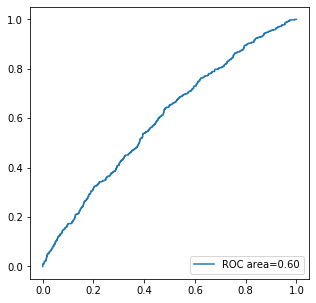

In [49]:
draw_roc(y_pred_final.Is_Churn, y_pred_final.Churn_prob)

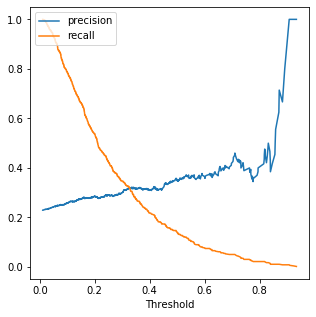

In [50]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.figure(figsize=(5,5))
plt.plot(thresholds,precision[:-1],label='precision')
plt.plot(thresholds,recall[:-1],label='recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
#display plot
plt.show()

In [65]:
y_final = np.copy(y_pred)
thresh = 0.3
y_final [y_final > thresh] = 1
y_final [y_final <= thresh] = 0
cm = confusion_matrix(y_test, y_final)

In [66]:
print(classification_report(y_test,y_final))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78      1540
           1       0.30      0.35      0.32       455

    accuracy                           0.67      1995
   macro avg       0.55      0.55      0.55      1995
weighted avg       0.68      0.67      0.68      1995



In [630]:
cm

array([[4444,  669],
       [ 488, 1049]])

In [487]:
cm

array([[5050,   63],
       [ 979,  558]])

#checking on test data


In [54]:
df_test=pd.read_csv(r'test_lTY72QC.csv')
df_test.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,55480787,50,Female,More than 15L,1008636.39,2,1,2,1,Average
1,9aededf2,36,Male,5L - 10L,341460.72,2,0,2,1,Average
2,a5034a09,25,Female,10L - 15L,439460.10,0,0,2,1,Good
3,b3256702,41,Male,Less than 5L,28581.93,0,1,2,1,Poor
4,dc28adb5,48,Male,More than 15L,1104540.03,2,1,3+,0,Good


In [55]:
df_test.shape

(2851, 10)

In [56]:
X_test_final=df_test.copy()
X_test_final.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,55480787,50,Female,More than 15L,1008636.39,2,1,2,1,Average
1,9aededf2,36,Male,5L - 10L,341460.72,2,0,2,1,Average
2,a5034a09,25,Female,10L - 15L,439460.10,0,0,2,1,Good
3,b3256702,41,Male,Less than 5L,28581.93,0,1,2,1,Poor
4,dc28adb5,48,Male,More than 15L,1104540.03,2,1,3+,0,Good


In [57]:
X_test_final['Age_Bin']=pd.cut(X_test_final['Age'],bins=bins,labels=[0,1,2,3,4,5])
X_test_final=X_test_final.drop(['ID','Age'],axis=1)

In [58]:
X_test_final.head()

,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Age_Bin
0,Female,More than 15L,1008636.39,2,1,2,1,Average,2
1,Male,5L - 10L,341460.72,2,0,2,1,Average,1
2,Female,10L - 15L,439460.10,0,0,2,1,Good,0
3,Male,Less than 5L,28581.93,0,1,2,1,Poor,2
4,Male,More than 15L,1104540.03,2,1,3+,0,Good,2


In [59]:
for i in cat_var:
    dummies=pd.get_dummies(X_test_final[i],prefix=i,drop_first=True)
    X_test_final=pd.concat([X_test_final,dummies],axis=1)
    
X_test_final=X_test_final.drop(cat_var,axis=1)
X_test_final.head()

,Balance,Age_Bin,Vintage_1,Vintage_2,Vintage_3,Vintage_4,Vintage_5,Transaction_Status_1,Product_Holdings_2,Product_Holdings_3+,Credit_Card_1,Gender_Male,Income_5L - 10L,Income_Less than 5L,Income_More than 15L,Credit_Category_Good,Credit_Category_Poor
0,1008636.39,2,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0
1,341460.72,1,0,1,0,0,0,0,1,0,1,1,1,0,0,0,0
2,439460.10,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
3,28581.93,2,0,0,0,0,0,1,1,0,1,1,0,1,0,0,1
4,1104540.03,2,0,1,0,0,0,1,0,1,0,1,0,0,1,1,0


In [691]:
#X_test[['Balance']]=scaler.transform(X_test[['Balance']])

In [60]:
X_test_final['Age_Bin']=X_test_final['Age_Bin'].astype('int')

In [693]:
X_test.head()

,Balance,Age_Bin,Vintage_1,Vintage_2,Vintage_3,Vintage_4,Vintage_5,Transaction_Status_1,Product_Holdings_2,Product_Holdings_3+,Credit_Card_1,Gender_Male,Income_5L - 10L,Income_Less than 5L,Income_More than 15L,Credit_Category_Good,Credit_Category_Poor
0,0.395646,2,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0
1,-0.898042,1,0,1,0,0,0,0,1,0,1,1,1,0,0,0,0
2,-0.708016,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
3,-1.504730,2,0,0,0,0,0,1,1,0,1,1,0,1,0,0,1
4,0.581608,2,0,1,0,0,0,1,0,1,0,1,0,0,1,1,0


In [68]:
y_test_f=[0]*X_test_final.shape[0]
xgdmat_test_final = xgb.DMatrix(X_test_final, y_test_f)


In [69]:
y_test_pred = xgb_final.predict(xgdmat_test_final)

In [70]:
y_test_pred

array([0.22517255, 0.23323156, 0.0124322 , ..., 0.5112796 , 0.32464978,
       0.155888  ], dtype=float32)

In [71]:
y_test_final = np.copy(y_test_pred)
thresh = 0.3
y_test_final [y_test_final > thresh] = 1
y_test_final [y_test_final <= thresh] = 0
#cm = confusion_matrix(y_train, y_final)

In [72]:
df_test['Is_Churn']=y_test_final

In [ ]:
df_test[['ID', 'Is_Churn']].to_csv('first_submission.csv', index=False)